In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# 1. Load the data
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target # This is in units of $100,000

print("New Challenge: California Housing")
print(df.head())

New Challenge: California Housing
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [2]:
print(df['MedHouseVal'].describe())

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64


In [3]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [4]:
# Calculate how much each feature relates to the price
correlation = df.corr()['MedHouseVal'].sort_values(ascending=False)
print(correlation)

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


In [18]:
from sklearn.model_selection import train_test_split

# 1. Define Features (X) and Target (y)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# 2. Split the data
# Note: We do NOT use 'stratify' here because y is a continuous number, not categories!
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")

Training set size: 16512 rows
Testing set size: 4128 rows


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Initialize the Regressor
# n_estimators=100 means 100 trees working together
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Train the model
rf_reg.fit(X_train, y_train)

# 3. Predict the prices for the test set
y_pred = rf_reg.predict(X_test)

# 4. Check the Error
# We use RMSE: Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"The model is off by an average of: ${rmse * 100000:.2f}")

The model is off by an average of: $50534.00


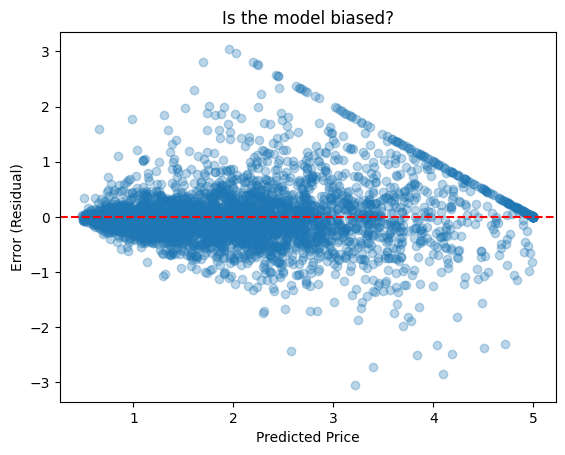

In [16]:
import matplotlib.pyplot as plt

# Calculate the differences (Residuals)
residuals = y_test - y_pred

plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Error (Residual)')
plt.title('Is the model biased?')
plt.show()